In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import h5py

IOError: [Errno 2] No such file or directory: '/Users/niloo/Desktop/new_estimate_Size/ice_statisics.eps'

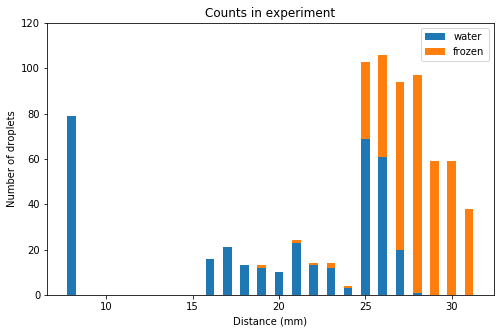

In [2]:
liquid = (79, 16, 21, 13, 12, 10, 23, 13, 12, 3, 69, 61, 20, 1, 0, 0, 0)
frozen = (0, 0, 0, 0, 1, 0, 1, 1, 2, 1, 34, 45, 74, 96, 59, 59, 38)
distance = np.array([8, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence
#ax1 = plt.gca()
#ax1.xaxis.set_ticks(distance[::2])
plt.figure(figsize=[8,5])
p1 = plt.bar(distance, liquid, width)
p2 = plt.bar(distance, frozen, width, bottom=liquid)
plt.ylabel('Number of droplets')
plt.xlabel('Distance (mm)')
plt.ylim(ymax=120)
plt.title('Counts in experiment')
plt.legend((p1[0], p2[0]), ('water', 'frozen'))
plt.savefig('/Users/niloo/Desktop/new_estimate_Size/ice_statisics.eps', format ='eps')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


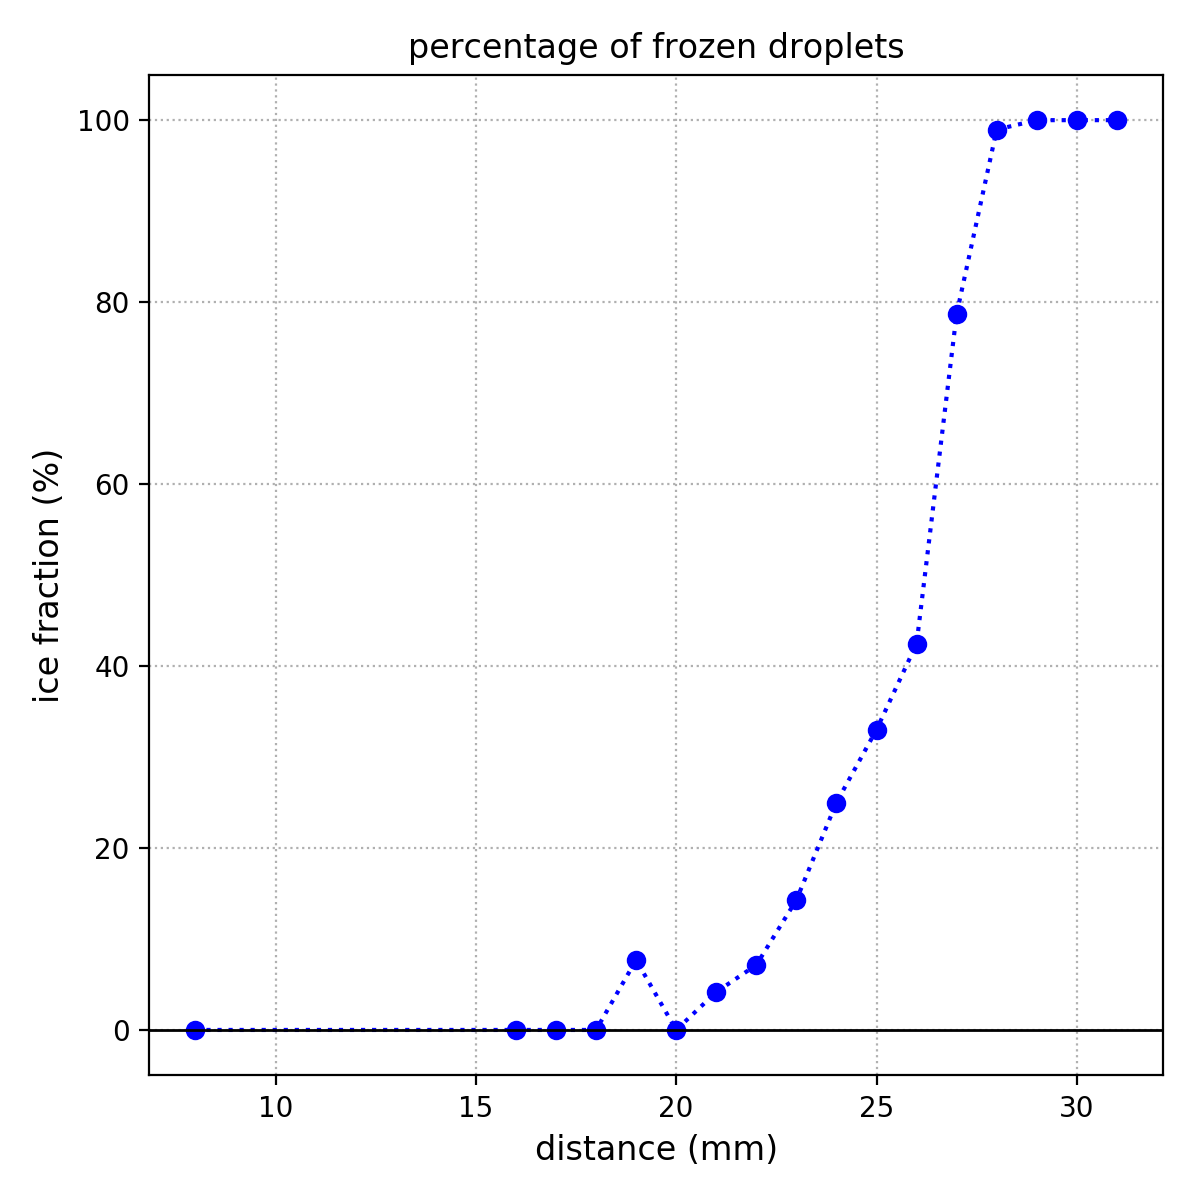

In [4]:
%matplotlib notebook
plt.figure(figsize=[6,6])
droplets = np.array([79.00, 16.00, 21.00, 13.00, 13.00, 10.00, 24.00, 14.00, 14.00, 4.00, 103.00, 106.00, 94.00, 97.00, 59.00, 59.00, 38.00])
#liquid = np.array([75.00, 20.00, 13.00, 10.00, 6.00, 4.00, 3.00, 1.00, 0.00])
frozen = np.array([0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 1.00, 1.00, 2.00, 1.00, 34.00, 45.00, 74.00, 96.00, 59.00, 59.00, 38.00])
percent_frozen = frozen/droplets*100.00
fraction = frozen/droplets
distance = np.array([8.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0])    # the x locations for the groups
plt.plot(distance, percent_frozen, 'bo:')
plt.ylabel('ice fraction (%)', fontsize = 12)
plt.xlabel('distance (mm)', fontsize = 12)
plt.title('percentage of frozen droplets')
plt.axhline(0,c='black',lw=1)
#plt.xlim(0,5)
#plt.ylim(0,5)
plt.grid(linestyle='dotted')
plt.tight_layout()
plt.show()

In [5]:
f=h5py.File('/Users/niloo/Desktop/distance_test/20191017/new22um.h5','r')

In [6]:
f.keys()
f['data'].keys()
Tave = f['data/Tave'][:]
t = f['data/time'][:]

NameError: name 'f' is not defined

<IPython.core.display.Javascript object>


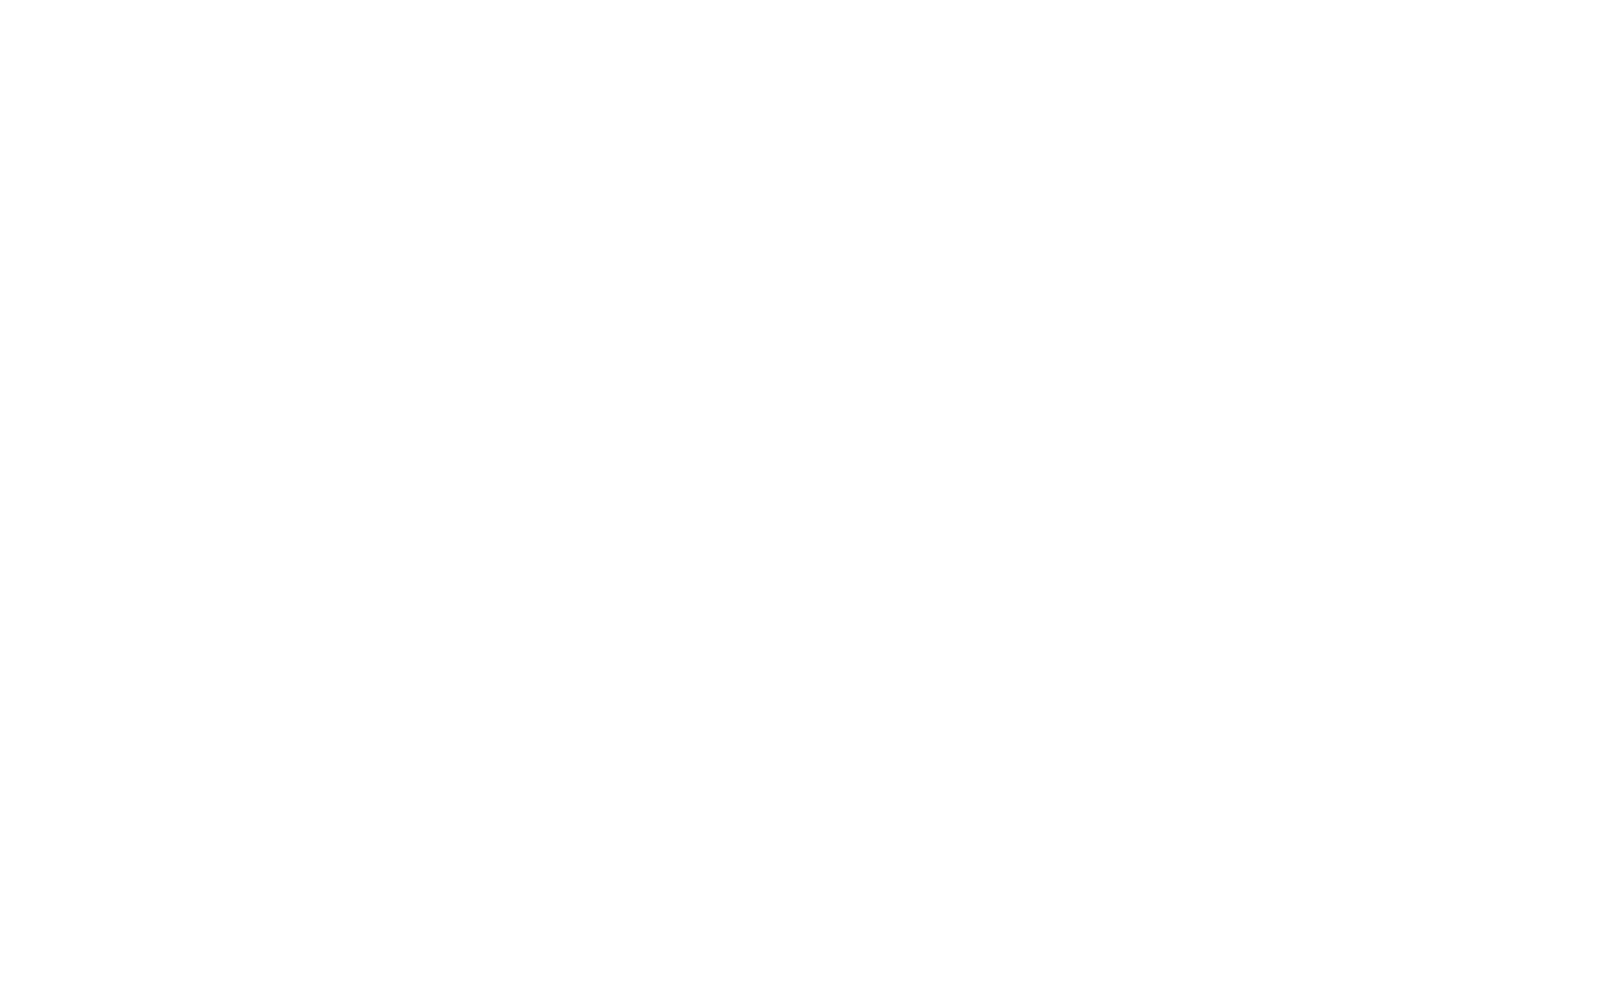

NameError: name 't' is not defined

In [7]:
%matplotlib notebook
fig = plt.figure(figsize=[8,5])
ax = fig.add_subplot(111)
tickmin = 0
tickmax = 100
tickspacing = 2
ax.set_xticks(np.arange(tickmin,tickmax,tickspacing))
ax.set_xticks(np.arange(tickmin,tickmax,1),minor=True)
ax_T=plt.gca()
lns1 = ax_T.plot(t*1000*5.1, Tave, label = 'Temperature (T) 22.6 $\mu$m')
ax_T.set_ylabel('Average temperature T(K)')
ax_T.set_yticks(np.arange(0, 300, step=5))
ax_T.set_ylim(220,295)
ax_T.set_xlim(0,30)
ax_T.set_xlabel('Distance (mm)')
#plt.legend(loc='upper right',fontsize=7)


velocity = 5.1 #m/s
time = distance*10**-3/velocity #ms
Volume = 6.044*10**-15 #cubic meters
J_list = np.zeros(len(distance)-1)
distance_shifted = [np.average([distance[n+1],distance[n]]) for n in range(len(distance)-1)]
for k in range(len(fraction)):
    if k!=0:
        J_list[k-1]= -np.log((1-fraction[k])/(1-fraction[k-1]))/(6.044*(time[k]-time[k-1]))*10**15
        #-np.log((1-fraction[n]/(1-fraction[n-1])))/Volume*(time[n]-time[n-1])
#nucl_rate = [x for x in J_list if ~np.isnan(x)]

ax_J = ax_T.twinx()

lns2 = ax_J.plot(distance_shifted, J_list,'go:', label = 'Nucleation rate (J) 22.6 $\mu$m')
#plt.yscale('log'
ax_J.set_ylabel('$J (m^{-3}s^{-1})$')
#ax_.xlabel('distance (mm)')
#plt.legend(loc='lower right',fontsize=7)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left',fontsize=10)
ax.grid(linestyle='dotted')
ax.grid(linestyle='dotted',which='minor',alpha =0.2)
plt.savefig('/Users/niloo/Desktop/new_estimate_Size/ice_statisics2.eps', format ='eps')
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


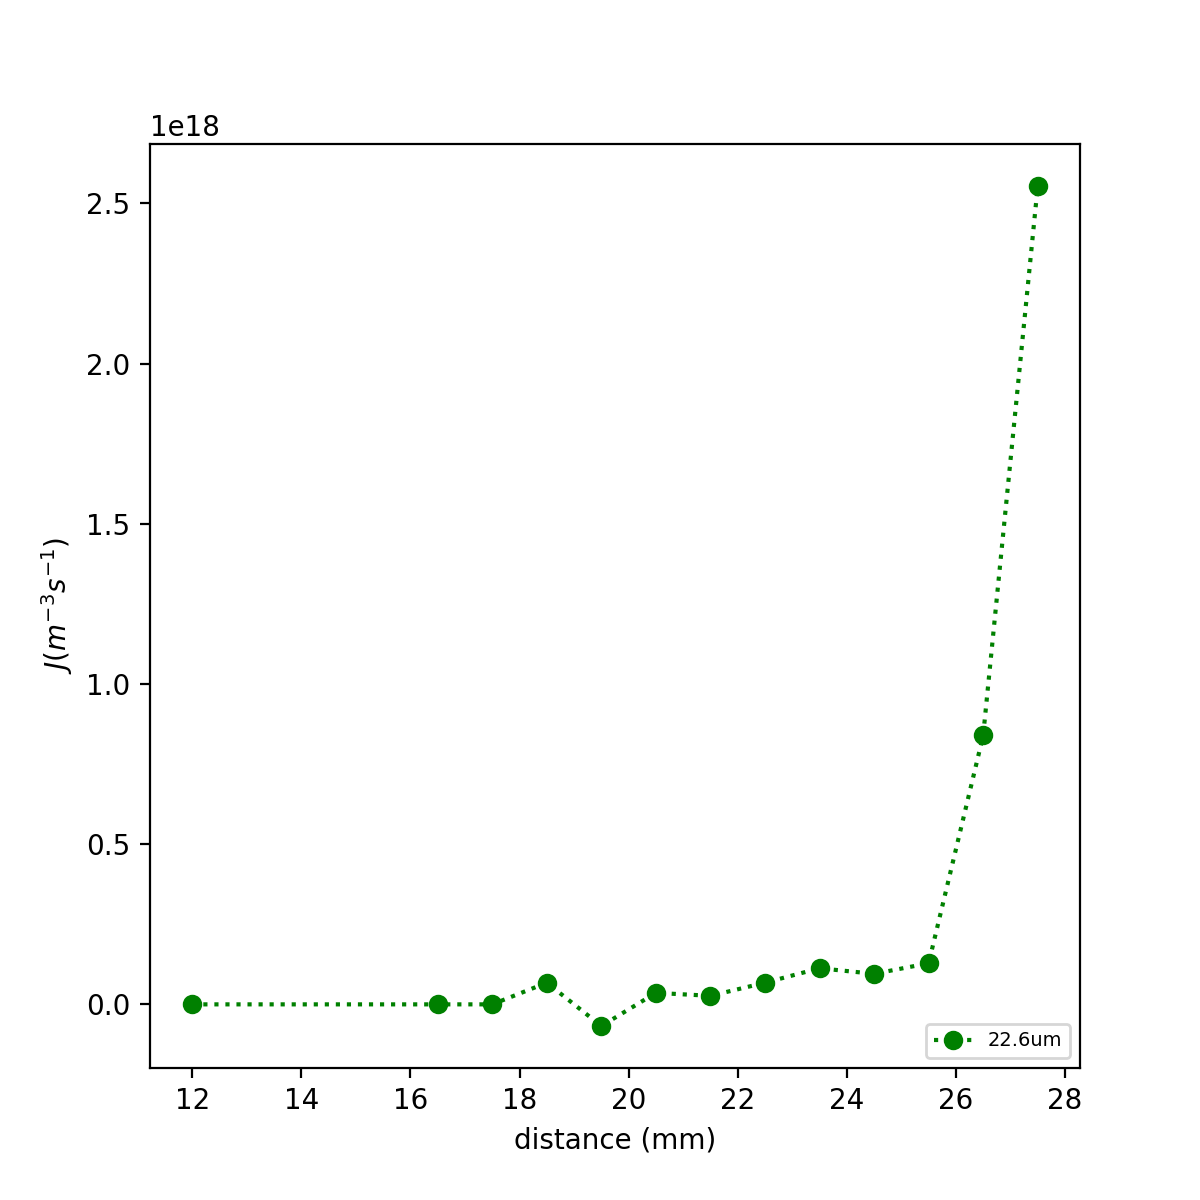

[0.00156863 0.00313725 0.00333333 0.00352941 0.00372549 0.00392157
 0.00411765 0.00431373 0.0045098  0.00470588 0.00490196 0.00509804
 0.00529412 0.0054902  0.00568627 0.00588235 0.00607843]
[ 8. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31.]
[0.         0.         0.         0.         0.07692308 0.
 0.04166667 0.07142857 0.14285714 0.25       0.33009709 0.4245283
 0.78723404 0.98969072 1.         1.         1.        ]
[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00  6.75410008e+16
 -6.75410008e+16  3.59123153e+16  2.66208843e+16  6.75410008e+16
  1.12675397e+17  9.53004793e+16  1.28211119e+17  8.39590689e+17
  2.55434434e+18             inf             nan             nan]
[12.0, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5]


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [13]:
%matplotlib notebook
plt.figure(figsize=[6,6])
velocity = 5.1 #m/s
time = distance*10**-3/velocity #ms
#Volume = 4.84*10**-14 #cubic meters
J_list = np.zeros(len(distance)-1)
distance_shifted = [np.average([distance[n+1],distance[n]]) for n in range(len(distance)-1)]
for k in range(len(fraction)):
    if k!=0:
        J_list[k-1]= -np.log((1-fraction[k])/(1-fraction[k-1]))/(6.044*(time[k]-time[k-1]))*10**15
        #-np.log((1-fraction[n]/(1-fraction[n-1])))/Volume*(time[n]-time[n-1])
#nucl_rate = [x for x in J_list if ~np.isnan(x)]
plt.plot(distance_shifted, J_list,'go:', label = '22.6um')
#plt.yscale('log')
plt.ylabel('$J (m^{-3}s^{-1})$')
plt.xlabel('distance (mm)')
plt.legend(loc='lower right',fontsize=7)
plt.show()

print(time)
print(distance)
print(fraction)
print(J_list)
print(distance_shifted)

In [202]:
n=2
distance[n+1]
np.average([distance[n+1],distance[n]])

17.5

In [189]:

np.array([n/2 for n in range(len(distance))])




array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8])

In [194]:
np.ones(5)

SyntaxError: invalid syntax (<ipython-input-194-99b15065ab85>, line 1)